# Milestone 1

## Notebook Title

Nama: `Evita Ardhiiya Ramadhani`, Batch: `11`

## Description

### Objective

- Mampu melakukan hypothesis testing terhadap dataset yang diberikan.
- Mampu membuat dashboard interaktif terhadap dataset yang diberikan.
- Mampu mempresentasikan hasil visualisasi data dan temuan.

### Problem Statement

Diberikan dataset Supermarket sales untuk dilakukan ekplorasi data dan hipotesis testing.

### URL Dashboard

https://evitar-batch11.herokuapp.com/

## Import Library

In [39]:
# import library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Data Loading

In [40]:
# Load dataset
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,income
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,40.35
996,996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,973.80
997,997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,31.84
998,998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,65.82


In [41]:
# melihat banyak baris dan kolom dataset
df.shape

(1000, 19)

In [42]:
# melihat tipe data dari kolom dan melihat missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

In [43]:
# melihat sebaran statistik secara umum
df.describe()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.00000
mean,499.500000,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,307.58738
std,288.819436,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,234.17651
min,0.000000,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,10.17000
25%,249.750000,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,118.49750
50%,499.500000,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,241.76000
75%,749.250000,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,448.90500
max,999.000000,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,993.00000


In [44]:
# melihat jumlah setiap kategori dalam kolom Product line
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [45]:
# groupby jumlah product line berdasarkan Gender dan jenis customer
df.groupby(['Gender', 'Customer type'])['Product line'].count()

Gender  Customer type
Female  Member           261
        Normal           240
Male    Member           240
        Normal           259
Name: Product line, dtype: int64

## Data cleaning

Sebelum melakukan data cleaning, terlebih dahulu mengecek jumlah missing value yang ada.

In [46]:
# mengecek jumlah missing value tiap kolom
df.isnull().sum()

Unnamed: 0                 0
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
income                     0
dtype: int64

Agar lebih meyakinkan pengecekan missing value dilakukan menggunakan try-except-statment untuk menghindari kemungkinan unexpected missing value.

In [47]:
cnt=0
for row in df:
    try:
        int(row)
        df.loc[cnt]=np.nan
    except ValueError:
        pass
    cnt+=1

In [48]:
df.isnull().sum()

Unnamed: 0                 0
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
income                     0
dtype: int64

Setelah dicek ternyata dataset tidak memiliki missing value. Data cleaning, done!

Menghapus kolom yang tidak diperlukan yaitu Unnamed: 0

In [49]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

Melihat persebaran outliner menggunakan boxplot

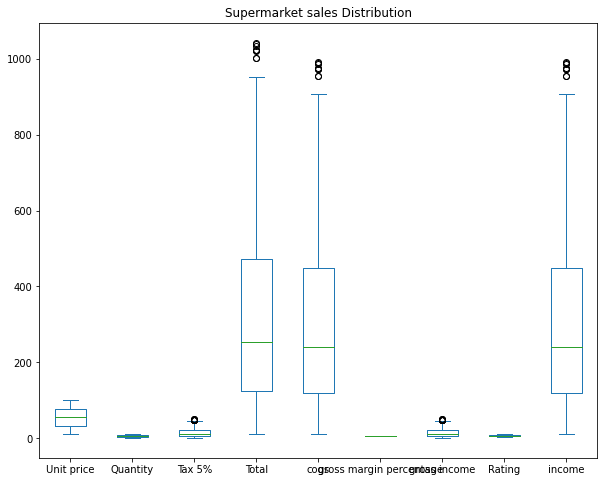

In [50]:
df.plot(kind='box', title='Supermarket sales Distribution', figsize=(10,8))
plt.show()

## Explorasi Data

Sebelum melakukan explorasi data, sebaiknya dilakukan copy dataset untuk menghindari perubahan dataset yang asli jika ingin digunakan kembali.

In [51]:
# copy dataset
data = df.copy()
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,income
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17


Membuat kolom baru 'income' dari hasil perkalian kolom 'Unit Price' dan 'Quantity'

In [52]:
data['income'] = data['Unit price'] * data['Quantity'] 
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,income
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17


### Visualisasi 1

Kita ingin melihat bagaimana fluktuasi pendapatan supermarket dari bulan januari hingga Maret.

In [53]:
# Mengubah type data Date untuk dijadikan index
data['Date'] = data['Date'].astype('datetime64[ns]')

In [54]:
# Mengatur index date dan di sorting
sorted_data = data.sort_values(by='Date', ascending=True).groupby('Date').sum()
sorted_data

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,income
Date,,,,,,,,,
2019-01-01,659.95,81,225.9610,4745.1810,4519.22,57.142857,225.9610,79.0,4519.22
2019-01-02,357.08,48,92.6430,1945.5030,1852.86,38.095238,92.6430,48.4,1852.86
2019-01-03,475.66,37,98.9585,2078.1285,1979.17,38.095238,98.9585,64.9,1979.17
2019-01-04,310.46,32,77.3185,1623.6885,1546.37,28.571429,77.3185,39.1,1546.37
2019-01-05,739.64,55,168.4135,3536.6835,3368.27,57.142857,168.4135,89.2,3368.27
...,...,...,...,...,...,...,...,...,...
2019-03-26,558.64,52,93.4530,1962.5130,1869.06,61.904762,93.4530,86.1,1869.06
2019-03-27,568.41,45,138.2295,2902.8195,2764.59,47.619048,138.2295,67.6,2764.59
2019-03-28,455.25,48,106.1620,2229.4020,2123.24,47.619048,106.1620,70.5,2123.24


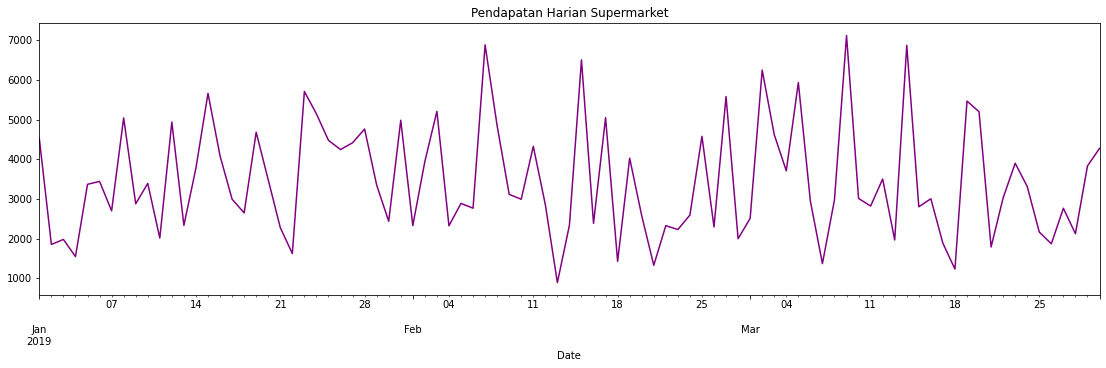

In [55]:
# membuat line chart pendapatan
fig, ax = plt.subplots(figsize=(19,5))
plt.title('Pendapatan Harian Supermarket')
sorted_data['income'].plot(kind='line',ax=ax, color='purple')
plt.show()

In [56]:
print(sorted_data['income'].max())
print(sorted_data['income'].min())

7118.14
889.75


Dari line chart di atas dapat dilihat bahwa pendapatan supermarket setiap hari mengalami fluktuasi yang beragam. Pendapatan tertinggi di peroleh pada 9 Maret 2019 = 7118.14 dan terendah pada 13 Februari 2019 = 889.75.

### Visualisasi 2

Kita ingin melihat Jumlah product line pada setiap kota.

Yangon

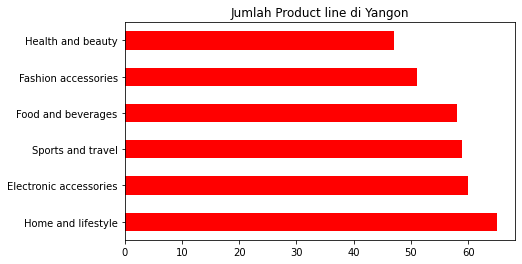

In [57]:
# filter City = yangon
yangon_product = data[(data['City'] == 'Yangon')]['Product line'].value_counts()

# bar plot
yangon_product.plot(kind='barh', color='red', figsize=(7,4))
plt.title('Jumlah Product line di Yangon')
plt.show()

Di kota Yangon produk yang paling banyak dibeli adalah Home and lifestyle dan paling sedikit adalah Healt and beauty

Mandalay

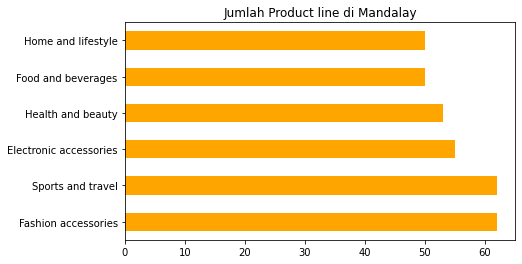

In [58]:
# filter City = mandalay
mandalay_product = data[(data['City'] == 'Mandalay')]['Product line'].value_counts()

# bar plot
mandalay_product.plot(kind='barh', color='orange', figsize=(7,4))
plt.title('Jumlah Product line di Mandalay')
plt.show()

Di kota Mandalay ada 2 masing-masing produk yang paling banyak dibeli yaitu Fashion accessories dan Sports and travel, sedangkan yang paling sedikit yaitu Food and beverages dan Home and lifestyle.

Kota Naypyitaw

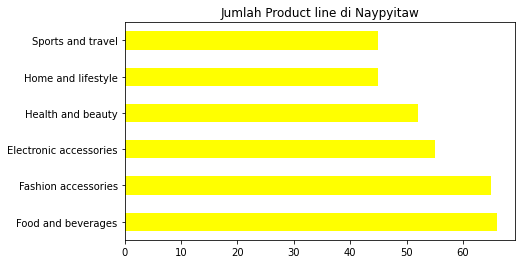

In [59]:
# filter city = naypyitaw
naypyitaw_product = data[(data['City'] == 'Naypyitaw')]['Product line'].value_counts()

# bar plot
naypyitaw_product.plot(kind='barh', color='yellow', figsize=(7,4))
plt.title('Jumlah Product line di Naypyitaw')
plt.show()

Di kota Naypyitaw yang paling banyak di beli adalah Food and beverages sedangkan ada 2 produk yang paling sedikit dibeli yaitu Home and lifestyle dan Sports and travel.

### Visualisasi 3

Kita ingin mengetahui banyak dari quantity dari setiap produk line yang dibeli oleh customer perempuan dan laki-laki. Jadi kita melakukan groupby berdasarkan jumlah gender dan product line.

In [60]:
# groupby gender dan product line untuk menghitung jumlah quantity
product_quantity = data.groupby(['Gender', 'Product line']).count()['Quantity'].reset_index()
product_quantity

,Gender,Product line,Quantity
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79
5,Female,Sports and travel,88
6,Male,Electronic accessories,86
7,Male,Fashion accessories,82
8,Male,Food and beverages,84
9,Male,Health and beauty,88


Menampilkan perbedaan quantity setiap product line antara perempuan dan laki-laki.

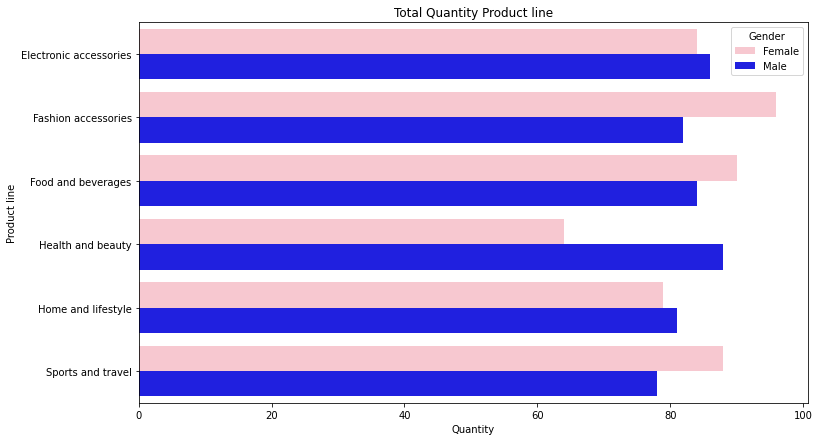

In [61]:
# membuat barchart secara horizontal
plt.figure(figsize=(12,7))
sns.barplot(x= product_quantity['Quantity'], 
            y=product_quantity['Product line'], 
            hue=product_quantity['Gender'], 
            palette=['pink','blue'])
plt.title('Total Quantity Product line')
plt.show()

Dari barplot diatas dapat dilihat bahwa Perempuan paling banyak membeli produk Fashion accessories dan paling sedikit di Healt and beauty, sedangkan untuk laki-laki paling banyak membeli di Health and beauty dan paling sedikit pada Sports and travel.

### Visualisasi 4

Jam berapa dalam sehari yang memiliki kunjungan customer terbanyak

In [62]:
# mengubah tipe data time
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = (data['Time']).dt.hour
data['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [63]:
# sort time sebagai index y
time_qua = data.sort_values(by='Hour', ascending=True).groupby('Hour').sum()

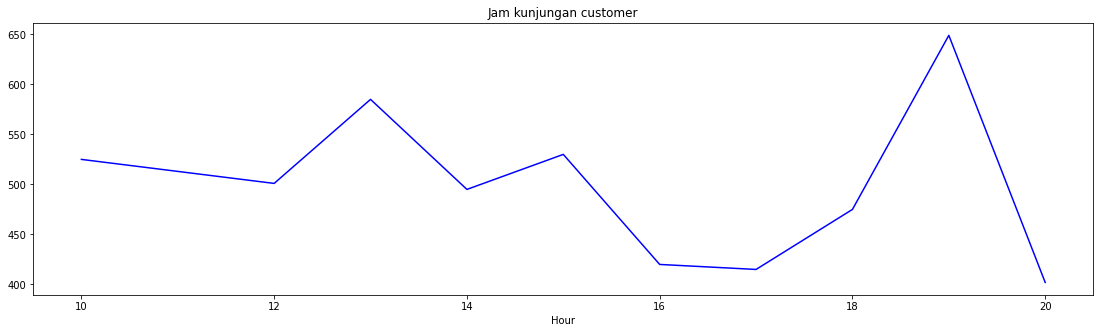

In [64]:
# membuat plot dari jumlah customer
fig, ax1 = plt.subplots(figsize=(19,5))
plt.title('Jam kunjungan customer')
time_qua['Quantity'].plot(kind='line', color='blue', ax=ax1)

plt.show()

Dari line chart jam kunjungan customer dapat dilihat bahwa pada jam rentang 19.00 memiliki kunjungan tertinggi, sedangkan kunjungan terendah pada rentang jam 17.00

### Visualisasi 5

Perbandingan jenis pembayaran yang digunakan Perempuan dan Laki-laki

Female

In [65]:
# filter gender = female
female_pay = data[(data['Gender'] == 'Female')]['Payment'].value_counts()

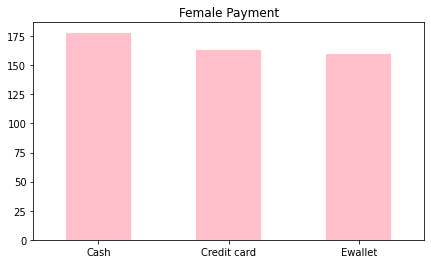

In [66]:
# bar plot
female_pay.plot(kind='bar', color='pink', figsize=(7,4))
plt.title('Female Payment')
plt.xticks(rotation=0)
plt.show()

untuk perempuan lebih banyak menggunakan cash sebagai pembayaran dibandingkan metode lainnya.

Male

In [67]:
# filter gender = female
male_pay = data[(data['Gender'] == 'Male')]['Payment'].value_counts()

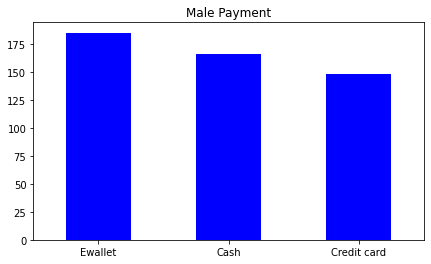

In [68]:
# bar plot
male_pay.plot(kind='bar', color='blue', figsize=(7,4))
plt.title('Male Payment')
plt.xticks(rotation=0)
plt.show()

Untuk Laki-laki lebih banyak menggunakan Ewallet sebagai pembayaran dibandingkan dengan credit card ataupun cash.

## Hypotesis Testing

Dari dataset Supermarker Sales, kita ingin menguji apakah rata-rata Pendapatan harian dari suatu Kota berbeda secara signifikan atau tidak. Sampel yang akan diuji meggunakan Yangon dan Mandalay. Pengujian hipotesis dilakukan menggunakan Two Samples Independent Two Tailed test.

In [69]:
# Melihat jenis kota yang ada didalam kolom City
data['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

Sebelum melakukan pengujian hipotesis, dilakukan terlebih dahulu preprosessing data untuk melihat Rata-rata penghasilan harian dengan menggunakan query dan groupby.

Menghitung rata-rata pendapatan harian dari kota Yangon

In [70]:
# Sort berdasarkan kota Yangon
daily_yangon = data[(data['City'] == 'Yangon')][['Date', 'income']].groupby('Date').sum()

# Menampilkan hasil rata-rata pendapatan
mean_yangon = np.round(daily_yangon['income'].mean())
print('Rata-rata pendapatan harian Yangon:', mean_yangon)

Rata-rata pendapatan harian Yangon: 1136.0


Mengitung rata-rata pendapatan harian kota Mandalay

In [71]:
# Sort bersadarkan kota Mandalay
daily_mandalay = data[(data['City'] == 'Mandalay')][['Date', 'income']].groupby('Date').sum()

# Menmpilkan hasil rata-rata pendapatan
mean_mandalay = np.round(daily_mandalay['income'].mean())
print('Rata-rata pendapatan harian Mandalay:', mean_mandalay)

Rata-rata pendapatan harian Mandalay: 1176.0


Setelah menghitung rata-rata penghasilan harian, selanjutnya membuat hipotesis yang akan diuji.

H0 adalah rata-rata pendapatan harian Yangon **tidak memiliki perbedaan yang signifikan** dengan rata-rata pendapatan harian Mandalay.
- H0 : μ_yangon = μ_mandalay

H1 adalah rata-rata pendapatan harian Yangon **memiliki perbedaan yang signifikan** dengan rata-rata pendapatan harian Mandalay.
- H1 : μ_yangon != μ_mandalay

Confident interval yang digunakan 95%, berarti alfa 0.05

Menguji hipotesis menggunakan t-test independent karena sampel merupakan sampel yang independent(tidak berhubungan).

In [72]:
# menguji hipotesis menggunakan t-test ind
t_stat, p_val = stats.ttest_ind(daily_yangon, daily_mandalay)

# melihat nilai p-value
print('P-value:',p_val[0])

# melihat nilai t-statistics
print('t-statistics:',t_stat[0])

P-value: 0.7377341666768829
t-statistics: -0.3353941180782607


Diperoleh nilai p-value = 0.7377341666768823 yang berarti nilai p-value lebih besar dari nilai alfa.

Visualisasi distribusi rata-rata pendapatan harian dari Yangon dan Mandalay.

Membuat distribusi normal dari Yangon dan Mandalay

In [73]:
# Distribusi Yangon
yangon = np.random.normal(daily_yangon.income.mean() , daily_yangon.income.std(),10000)
# Distribusi Mandalay
mandalay = np.random.normal(daily_mandalay.income.mean(),daily_mandalay.income.std(),10000)

Membuat confident interval 95%

In [74]:
ci = stats.norm.interval(0.95, daily_yangon.income.mean(), daily_yangon.income.std())

Membuat batasan hipotesis alternatif dari Yangon

In [75]:
alt_hipo1 = yangon.mean() + t_stat[0]*yangon.std()
alt_hipo2 = yangon.mean() - t_stat[0]*yangon.std()

Membuat plot distribusi normal

c:\Users\Hp\anaconda3\envs\Hacktiv8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Hp\anaconda3\envs\Hacktiv8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


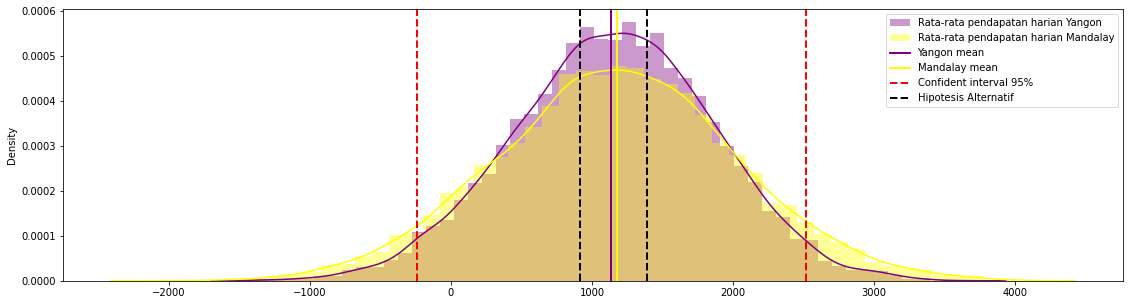

In [76]:
# plot distribusi normal
plt.figure(figsize=(19,5))
sns.distplot(yangon, label='Rata-rata pendapatan harian Yangon',color='purple')
sns.distplot(mandalay, label='Rata-rata pendapatan harian Mandalay',color='yellow')

# mean dari Yangon dan Mandalay
plt.axvline(mean_yangon, color='purple', linewidth=2, label='Yangon mean')
plt.axvline(mean_mandalay, color='yellow',  linewidth=2, label='Mandalay mean')

# garis confident interval 95%
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2, label='Confident interval 95%')
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)

# garis hipotesis alternatif
plt.axvline(alt_hipo1, color='black', linestyle='dashed', linewidth=2, label = 'Hipotesis Alternatif')
plt.axvline(alt_hipo2, color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

Dari visualisasi distribusi diatas dapat dilihat bahwa garis Hipotesis alternatif (black) berada didalam garis confident interval 95% (red) dan garis mean dari Yangon dan Mandalay saling berdekatan.

Berdasarkan perhitungan nilai p=value dan visualisasi distribusi dapat diketahui bahwa kita **fail to reject H0**. Artinya, rata-rata pendapatan harian Yangon dan Mandalay **tidak memiliki perbedaan yang signifikan**.

## Kesimpulan

Dari eksplorasi dan pengujian hipotesis dataset Supermaket Sales diperoleh beberapa informasi sebagai berikut:

- Visualisasi 1, dapat diketahui bahwa pendapatan supermarket setiap hari mengalami fluktuasi yang beragam. Pendapatan tertinggi di peroleh pada 9 Maret 2019 = 7118.14 dan terendah pada 13 Februari 2019 = 889.75.

- Visualisasi 2, perbedaan jumlah produk line yang diminati setiap kota berbeda. Untuk kota Yangon produk yang paling banyak dibeli adalah Home and lifestyle dan paling sedikit adalah Healt and beauty. Di kota Mandalay ada 2 masing-masing produk yang paling banyak dibeli yaitu Fashion accessories dan Sports and travel, sedangkan yang paling sedikit yaitu Food and beverages dan Home and lifestyle. Di kota Naypyitaw yang paling banyak di beli adalah Food and beverages sedangkan ada 2 produk yang paling sedikit dibeli yaitu Home and lifestyle dan Sports and travel.

- Visualisasi 3, Perbedaan quantity setiap product line yang dibeli oleh Perempuan dan laki-laki, bahwa Perempuan paling banyak membeli produk Fashion accessories dan paling sedikit di Healt and beauty, sedangkan untuk laki-laki paling banyak membeli di Health and beauty dan paling sedikit pada Sports and travel.

- Visualisasi 4, Jam kujungan customer rentang 19.00 memiliki kunjungan tertinggi, sedangkan kunjungan terendah pada rentang jam 17.00. oleh karena itu pihak dari supermarket bisa menambahkan jumlah diskon atau promo pada jam 19.00 serta menambahkan pegawai agar customer tidak lama untuk mengantri.

- Visualisasi 5, diketahui perempuan lebih sering menggunakan cash sedangkan laki-laki menggunakan Ewallet. untuk menarik perhatian customer perempuan atau laki-laki untuk menggunakan credit card, bisa menambahkan promo atau potongan jika payment dilakukan dengan debit card.

Pada pengujian hipotesis dilakukan pengujian untuk mengetahui apakah rata-rata Pendapatan harian dari suatu Kota berbeda secara signifikan atau tidak. Sampel yang akan diuji meggunakan Yangon dan Mandalay. Pengujian hipotesis dilakukan menggunakan Two Samples Independent Two Tailed test. Confident interval yang digunakan adalah 95%.

Hasil yang diperoleh untuk nilai p-value = 0.7377 dan t-statistics =  -0.3354. Jadi p-value leboh besar dari nilai alfa(0.05). Dari visualisasi distribusi diatas dapat dilihat bahwa garis Hipotesis alternatif (black) berada didalam garis confident interval 95% (red) dan garis mean dari Yangon dan Mandalay saling berdekatan. Berdasarkan perhitungan nilai p=value dan visualisasi distribusi dapat diketahui bahwa kita **fail to reject H0**. Artinya, rata-rata pendapatan harian Yangon dan Mandalay **tidak memiliki perbedaan yang signifikan**.